# What does it take to become a legend in Tennis?
By Kristian, Pavan and Boris
<i>Department of Data Science and Knowledge Engineering, Maastricht University<i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")

pd.options.mode.chained_assignment = None  # default='warn'

# Import the data
Already filtered keeping seasons 2019 to 2021

In [24]:
df_2019 = pd.read_csv("data/atp_matches_2019.csv")
df_2020 = pd.read_csv("data/atp_matches_2020.csv")
df_2021 = pd.read_csv("data/atp_matches_2021.csv")

seasons = [df_2019, df_2020, df_2021]
df_full = pd.concat(seasons)

# check whether we have same number of columns
# assert len(df_2019.columns) == len(df_full.columns)

df_full.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,c
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,NaN
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,NaN
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,NaN
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,NaN
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,NaN


## Research Question 1: Does Experience beat skill in pressure situations?

We will analyse this question by looking at data on break points in a tennis game. Break points are certainly some of the most tense and exciting part of a tennis game and we  will analyse if experienced players win more breakpoints than maturing players.

In [25]:
df_full_copy= df_full[["winner_name","winner_age","score","w_bpSaved","w_bpFaced","l_bpSaved","l_bpFaced","winner_name","loser_age"]].copy()
df_full_copy.reset_index(drop=True, inplace=True)
df_full_copy["w_bpratio"]= df_full_copy["w_bpSaved"]/ df_full_copy["w_bpFaced"]
df_full_copy["l_bpratio"]= df_full_copy["l_bpSaved"]/ df_full_copy["l_bpFaced"]

We will only consider games that had atleast 3 or more breakpoints so we get a good measure of generality.

In [26]:
df_full_copy= df_full_copy.loc[(df_full_copy["w_bpFaced"]>3.0) & (df_full_copy["l_bpFaced"]>3.0)]

First, lets look at how important it is to have a knack to win breakpoints.

In [27]:
conditions=[(df_full_copy["w_bpratio"]>= df_full_copy["l_bpratio"]),(df_full_copy["w_bpratio"]<= df_full_copy["l_bpratio"])]
values=["Game won by player with higher Break Points victory", "Game won by player with lower Break Points victory"]
df_full_copy["breakpoint_champ"]= np.select(conditions,values)
bp_cham_val= df_full_copy['breakpoint_champ'].value_counts().index.tolist()
bp_cham_valcount=df_full_copy["breakpoint_champ"].value_counts().tolist()

Text(0.5, 1.0, 'How important is it winning breakpoints?')

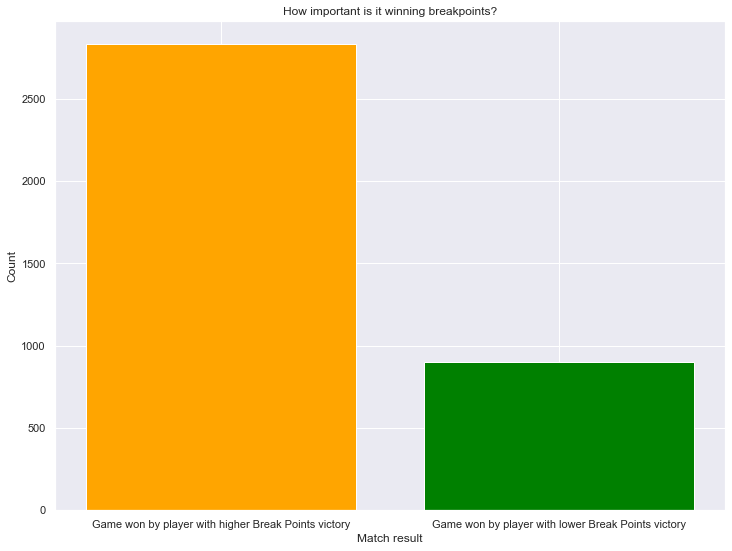

In [28]:
ax=plt.bar(bp_cham_val,bp_cham_valcount, color=['orange','green'])
plt.xlabel("Match result")
plt.ylabel("Count")
plt.title("How important is it winning breakpoints?")

Players who win more breakpoints are 3x more likey to win the match.

## What does it take to win a BreakPoint

Many say experience is key, lets see what the data has to say.
We will analyse the data and patterns of players who were defeated and who emerged victorious seperately. But we will soon notice that both categories exhibit similar patterns.

In [29]:
loser_numeric= df_full[["loser_ht","loser_age","l_ace","l_df","l_svpt","l_1stIn","l_1stWon","l_2ndWon","l_SvGms","l_bpSaved","l_bpFaced","tourney_level"]]
loser_numeric=loser_numeric.dropna()
loser_numeric.reset_index(drop=True, inplace=True)

In [30]:
winner_numeric= df_full[["winner_ht","winner_age","w_ace","w_df","w_svpt","w_1stIn","w_1stWon","w_2ndWon","w_SvGms","w_bpSaved","w_bpFaced","tourney_level"]]
winner_numeric=winner_numeric.dropna()
winner_numeric.reset_index(drop=True, inplace=True)
loser_numeric["l_bpratio"]= loser_numeric["l_bpSaved"]/ loser_numeric["l_bpFaced"]
winner_numeric["w_bpratio"]= winner_numeric["w_bpSaved"]/ winner_numeric["w_bpFaced"]

In [31]:
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized 
      to have 0-mean and unit variance
    '''

    standardized_data= (data-data.mean())/ data.std()
  
    return standardized_data

In [32]:
loser_numeric.loc[loser_numeric['loser_age']<=18, 'Experience']= 'under-18'
loser_numeric.loc[loser_numeric['loser_age']>18, 'Experience']= 'Rookie'
loser_numeric.loc[loser_numeric['loser_age']>23, 'Experience']= 'Intermediate'
loser_numeric.loc[loser_numeric['loser_age']>26, 'Experience']= 'Professional'
loser_numeric.loc[loser_numeric['loser_age']>30, 'Experience']= 'Veteran'

winner_numeric.loc[winner_numeric['winner_age']<=18, 'Experience']= 'under-18'
winner_numeric.loc[winner_numeric['winner_age']>18, 'Experience']= 'Rookie'
winner_numeric.loc[winner_numeric['winner_age']>23, 'Experience']= 'Intermediate'
winner_numeric.loc[winner_numeric['winner_age']>26, 'Experience']= 'Professional'
winner_numeric.loc[winner_numeric['winner_age']>30, 'Experience']= 'Veteran'

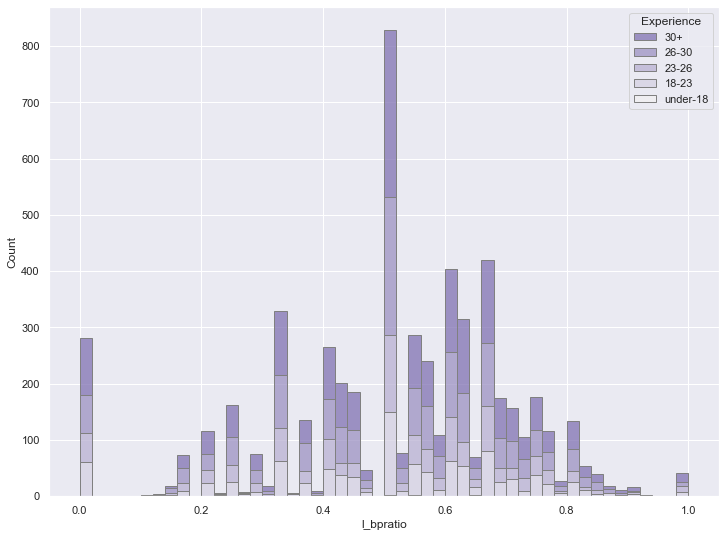

In [33]:
sns.set_theme(style="darkgrid")
loser_numeric.loc[loser_numeric['loser_age']<=18, 'Experience']= 'under-18'
loser_numeric.loc[loser_numeric['loser_age']>18, 'Experience']= '18-23'
loser_numeric.loc[loser_numeric['loser_age']>23, 'Experience']= '23-26'
loser_numeric.loc[loser_numeric['loser_age']>26, 'Experience']= '26-30'
loser_numeric.loc[loser_numeric['loser_age']>30, 'Experience']= '30+'

hue_order = ["30+",'26-30','23-26','18-23','under-18' ]

plot = sns.histplot(loser_numeric, x="l_bpratio",hue="Experience", multiple="stack",
                    palette="light:m_r",hue_order=hue_order, edgecolor=".5",
                    bins = 50)

Here we see that there is no one specific region that is been entirely dominated by a certain "Experience category".

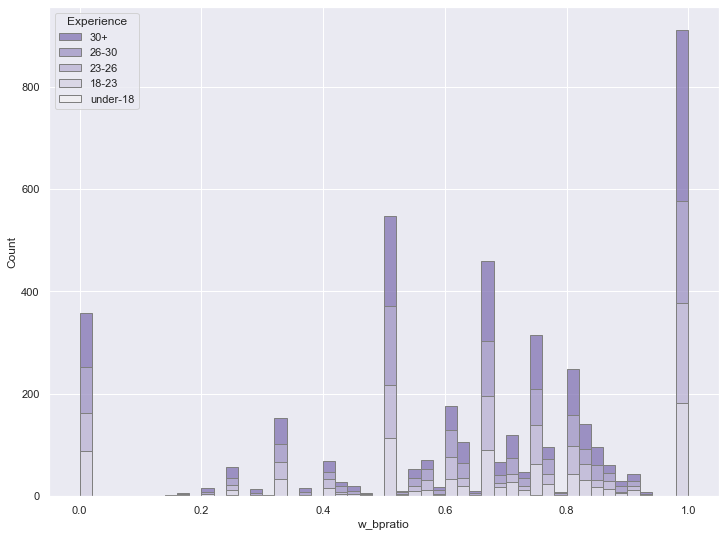

In [34]:
sns.set_theme(style="darkgrid")
winner_numeric.loc[winner_numeric['winner_age']<=18, 'Experience']= 'under-18'
winner_numeric.loc[winner_numeric['winner_age']>18, 'Experience']= '18-23'
winner_numeric.loc[winner_numeric['winner_age']>23, 'Experience']= '23-26'
winner_numeric.loc[winner_numeric['winner_age']>26, 'Experience']= '26-30'
winner_numeric.loc[winner_numeric['winner_age']>30, 'Experience']= '30+'

hue_order = ["30+",'26-30','23-26','18-23','under-18' ]

plot = sns.histplot(winner_numeric, x="w_bpratio",hue="Experience", multiple="stack",
                    palette="light:m_r",hue_order=hue_order, edgecolor=".5",
                    bins = 50)


The same pattern is noticed with players who emerged victorious in a game.

## Games with a age difference of 5 years
Let's filter a bit more now. We will consider games that have atlease 5 or more years in age difference. This should really expose the effects of experience if there is any.

In [35]:
diff_age= df_full_copy.loc[abs(df_full_copy['winner_age']- df_full_copy['loser_age'])>5]
conditions=[(diff_age["winner_age"]> diff_age['loser_age'])& (diff_age['w_bpratio']>=diff_age['l_bpratio']),
            (diff_age["winner_age"]> diff_age['loser_age'])& (diff_age['l_bpratio']>diff_age['w_bpratio']),
            (diff_age["winner_age"]<diff_age['loser_age'])& (diff_age['w_bpratio']>=diff_age['l_bpratio']),
            (diff_age["winner_age"]< diff_age['loser_age'])& (diff_age['w_bpratio']<diff_age['l_bpratio'])]

values=['More Experience','Less Experience','Less Experience','More Experience']

Text(0.5, 1.0, 'Who wins more breakpoints?')

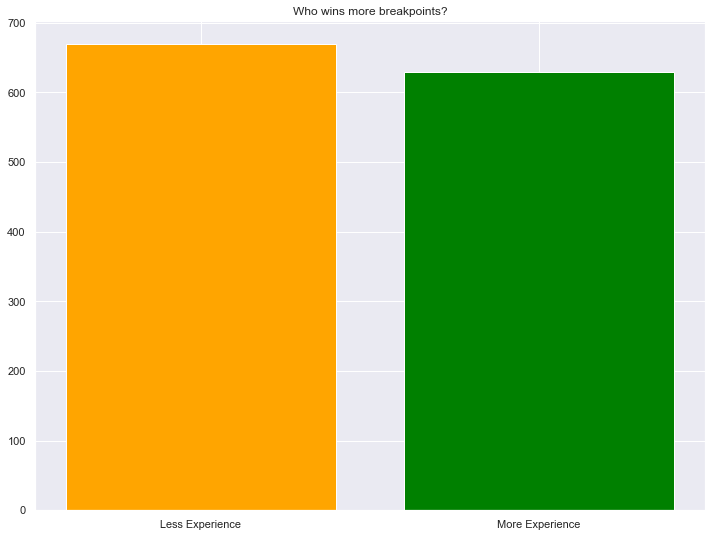

In [36]:
diff_age['bp_winner']= np.select(conditions,values)
bp_cham_val= diff_age['bp_winner'].value_counts().index.tolist()
bp_cham_valcount=diff_age["bp_winner"].value_counts().tolist()

plt.bar(bp_cham_val,bp_cham_valcount, color=['orange','green'])
plt.title("Who wins more breakpoints?")


Much to our surprise we see that the proportion of victories is almost 50-50.

Text(0.5, 1.0, 'Experience per age group')

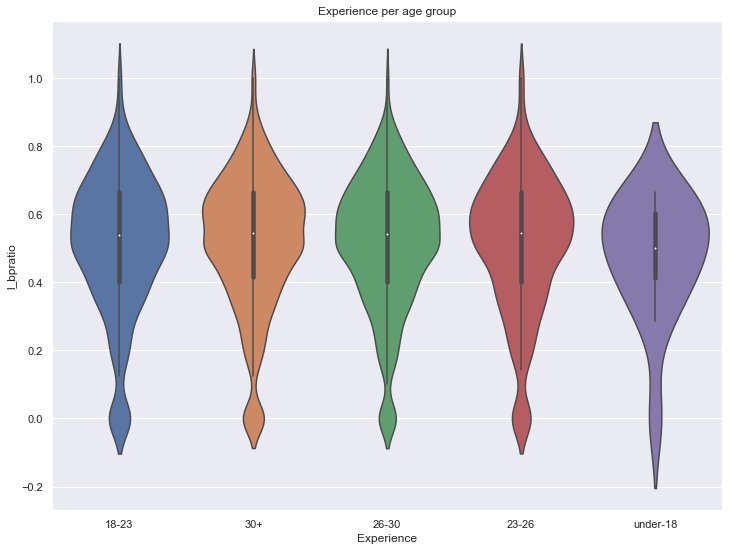

In [45]:
sns.violinplot(x='Experience', y='l_bpratio',data=loser_numeric)
plt.title("Experience per age group for losses")

The violin plot really shows that as well. The probability distribution of player across different "Experience" categories carry a uncanny resemblence to each other.

Text(0.5, 1.0, 'Experience per age group for victories')

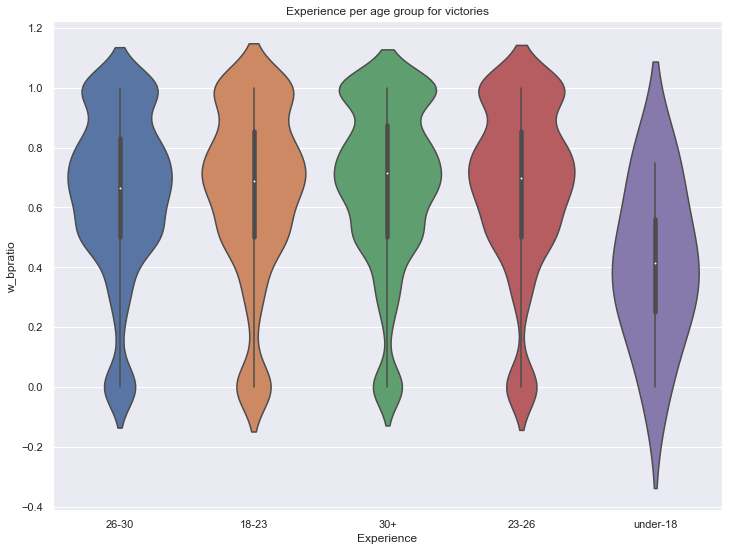

In [46]:
sns.violinplot(x='Experience', y='w_bpratio',data=winner_numeric)
plt.title("Experience per age group for victories")

We notice that in both plots, the under-18 category exhibts a slightly lower brek point victory ratio. This is our first evidence of youngers players struglling with pressure.

## Does Tournament Level change things up?

In [41]:
loser_numeric.reset_index(drop=True, inplace=True)
loser_numeric['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

Text(0.5, 1.0, 'Change in Breakpoint ratios across different tournament standards')

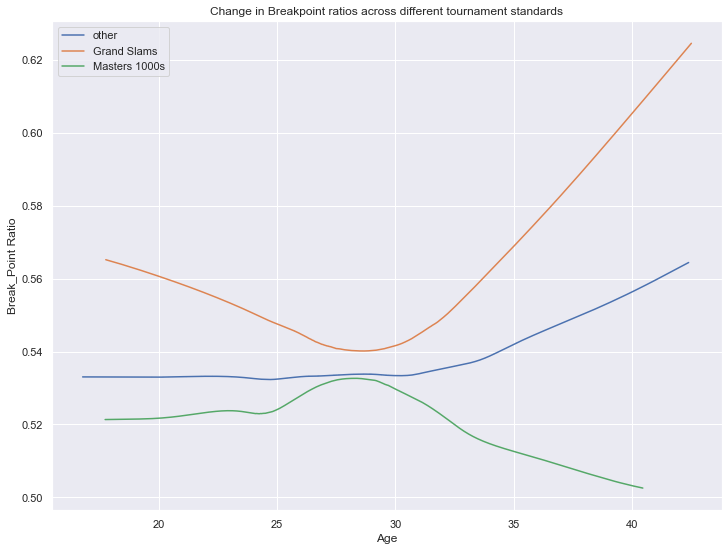

In [42]:
from statsmodels.nonparametric.smoothers_lowess import lowess
d={"age": loser_numeric["loser_age"], "bp_ratio": loser_numeric["l_bpratio"],"Tournament":loser_numeric['tourney_level']}
age_counts= pd.DataFrame(data=d)

tourney_list= age_counts["Tournament"].unique()
for tourney in tourney_list:
    age_data= age_counts.loc[age_counts['Tournament']== tourney]
    yobs= age_data['bp_ratio']
    x_obs= age_data['age']
    ysmooth= lowess(yobs,x_obs,return_sorted=False)
    sns.lineplot(x=x_obs,y=ysmooth,label= tourney)
    plt.legend()
plt.xlabel("Age")
plt.ylabel("Break_Point Ratio")
plt.title("Change in Breakpoint ratios across different tournament standards")

In [43]:
winner_numeric.reset_index(drop=True, inplace=True)
winner_numeric['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

Text(0.5, 1.0, 'Change in Breakpoint ratios across different tournament standards')

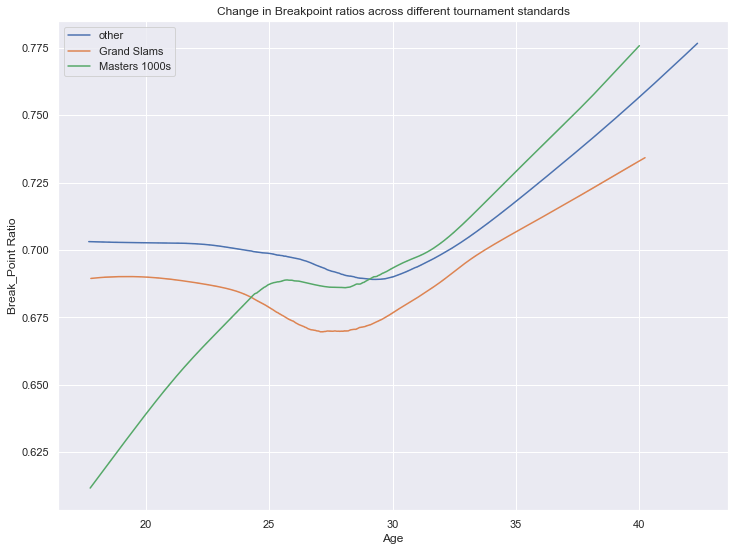

In [44]:
from statsmodels.nonparametric.smoothers_lowess import lowess
d={"age": winner_numeric["winner_age"], "bp_ratio": winner_numeric["w_bpratio"],"Tournament":winner_numeric['tourney_level']}
age_counts= pd.DataFrame(data=d)

tourney_list= age_counts["Tournament"].unique()
for tourney in tourney_list:
    age_data= age_counts.loc[age_counts['Tournament']== tourney]
    yobs= age_data['bp_ratio']
    x_obs= age_data['age']
    ysmooth= lowess(yobs,x_obs,return_sorted=False)
    sns.lineplot(x=x_obs,y=ysmooth,label= tourney)
    plt.legend()
plt.xlabel("Age")
plt.ylabel("Break_Point Ratio")
plt.title("Change in Breakpoint ratios across different tournament standards")

After smoothening and estimating using the lowess function, we notice a trend in the Grand Slams (the pinnacle of professional tennis). We notice that the Break Point Ratio does not change by much with increase in age. Whereas in some lower tournament classes such as the Master 1000s and ATP500, there is a much higher change where break point ratio increases with age. But this change is still not definite enough to prove that experience beats skill during break points.

## Research Question 2: Does height provide an advantage during serve?

We start by removing all instances with missing data in the columns we will investigate

In [47]:
df_serv = df_full.dropna(subset=['winner_ht','loser_ht', 'w_ace', 'w_svpt',
                                 'l_ace', 'l_svpt'])
print('before removing na:', len(df_full), 'after:', len(df_serv))
df_serv['w_ace_ratio'] = df_serv['w_ace'] / df_serv['w_svpt']
df_serv['l_ace_ratio'] = df_serv['l_ace'] / df_serv['l_svpt']

before removing na: 6985 after: 5381


<Figure size 864x648 with 0 Axes>

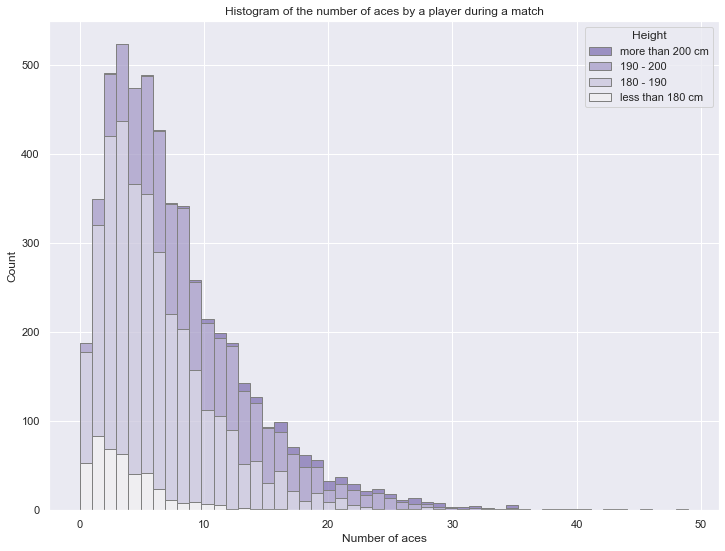

<Figure size 864x648 with 0 Axes>

In [48]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200 cm'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180 cm'

hue_order = ['more than 200 cm', '190 - 200', '180 - 190', 'less than 180 cm']

plot = sns.histplot(df_serv, x="w_ace", hue="Height",multiple="stack",
                    palette="light:m_r", hue_order=hue_order, edgecolor=".5",
                    bins = 50)

plot.set_xlabel('Number of aces')
plot.set_title('Histogram of the number of aces by a player during a match')
plt.figure()

First thing we look at: number of aces, which is when the opponent can’t even touch the ball on your serve. You notice on the histogram above brighter blue is predominant for lower value of number of aces, while for higher values, darker blue is predominant. This means most of the players that scores many aces in a game have a height above 200cm.

<Figure size 864x648 with 0 Axes>

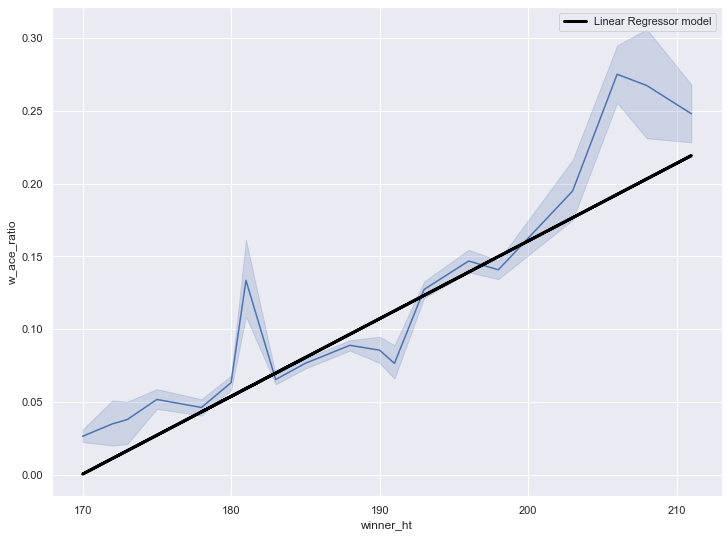

<Figure size 864x648 with 0 Axes>

In [80]:
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

regressor = LinearRegression()

x = df_serv['winner_ht'].values
x = x.reshape(-1, 1)
y = df_serv['w_ace_ratio'].values
regressor.fit(x, y)
y_pred = regressor.predict(x)

df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)
sns.lineplot(x="winner_ht", y="w_ace_ratio", data=df_serv)
v = plt.plot(x, y_pred, color="black", linewidth=3)
plt.legend(v, ['Linear Regressor model'])
plot.set_xlabel('Player Height')
plot.set_ylabel('Ace Ratio')
plot.set_title('Ace ratio based on the player\'s height')
plt.figure()

There's a positive correlation between a player's height and his ace ratio. Our very basic linear regression model (with only one feature here, the player's height) confirms it. 

<Figure size 864x648 with 0 Axes>

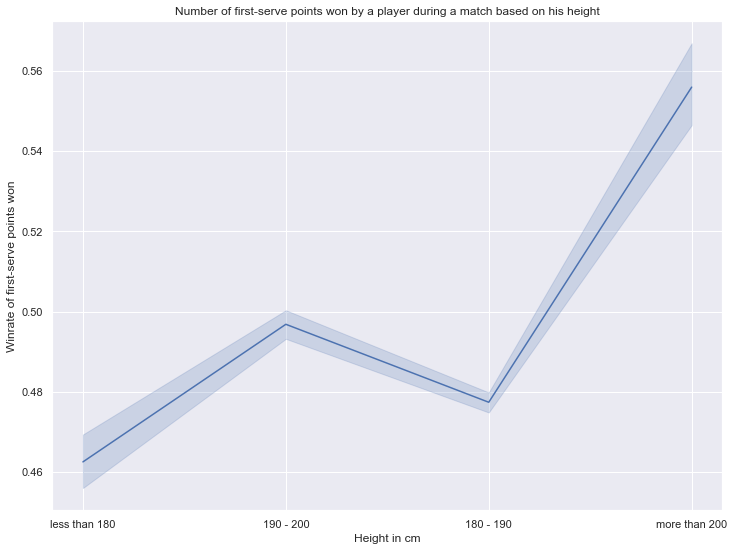

<Figure size 864x648 with 0 Axes>

In [50]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180'

df_serv['1st_winrate'] = df_serv['w_1stWon'] / df_serv['w_svpt']

plot = sns.lineplot(x="Height", y="1st_winrate", data=df_serv)

plot.set_xlabel('Height in cm')
plot.set_ylabel('Winrate of first-serve points won')
plot.set_title('Number of first-serve points won by a player during a match based on his height')
plt.figure()

A player taller than 2 meters wins approximately 56% of the points in which he put his first serve on the court. This winrate is only of 46% for players smaller than 1m80. 

<Figure size 864x648 with 0 Axes>

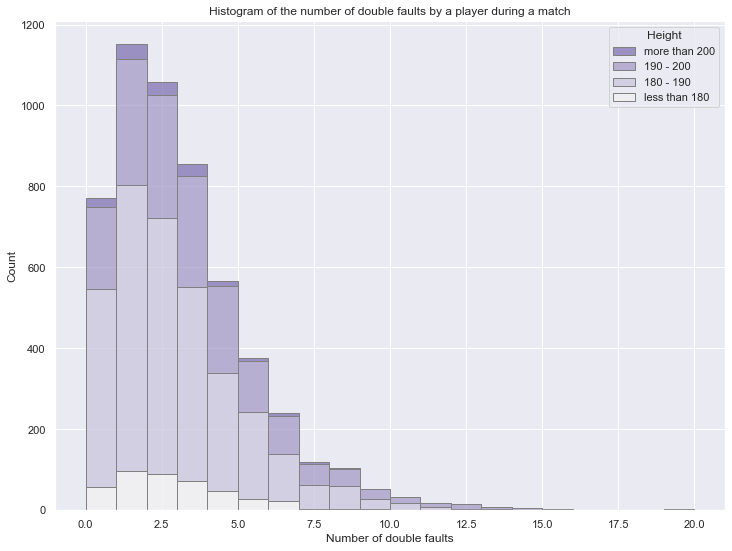

<Figure size 864x648 with 0 Axes>

In [51]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

df_serv.loc[df_serv['winner_ht'] >= 200, 'Height'] = 'more than 200'
df_serv.loc[df_serv['winner_ht'] < 200, 'Height'] = '190 - 200'
df_serv.loc[df_serv['winner_ht'] < 190, 'Height'] = '180 - 190'
df_serv.loc[df_serv['winner_ht'] < 180, 'Height'] = 'less than 180'

hue_order = ['more than 200', '190 - 200', '180 - 190', 'less than 180']

plot = sns.histplot(df_serv, x="w_df", hue="Height",multiple="stack",
                    palette="light:m_r", hue_order=hue_order, edgecolor=".5",
                    bins = 20)

plot.set_xlabel('Number of double faults')
plot.set_title('Histogram of the number of double faults by a player during a match')
plt.figure()

Another important thing to look at for serve are double faults, which is when you miss two serve in a row (and makes you lose the point). There isn't much to conclude from this histogram. Let's have a closer look at double faults.

<Figure size 864x648 with 0 Axes>

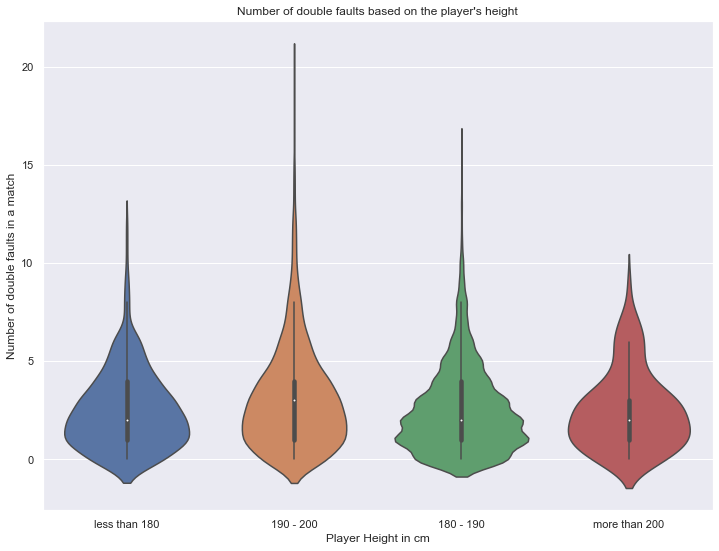

<Figure size 864x648 with 0 Axes>

In [52]:
df_serv.reset_index(drop=True, inplace=True)
df_serv['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)

plot = sns.violinplot(x="Height", y="w_df",#  hue='tourney_level',
             data=df_serv)

plot.set_xlabel('Player Height in cm')
plot.set_ylabel('Number of double faults in a match')
plot.set_title('Number of double faults based on the player\'s height')
plt.figure()

The 4 violins are more or less equivalent, at least for the interquartile range which is for each violin between 1 and 4. This means taller and smaller players make an equivalent number of double faults per game. This can be confirmed by the fact that te correlation between a player's number of double faults and his height is of only 0.09. 

In [53]:
print('Correlation between the winner double faults and winner height is of:',
      df_serv.corr()['w_df']['winner_ht'])

Correlation between the winner double faults and winner height is of: 0.09891052293492311


We can conclude from our findings being taller provides you an advantage on your first seve. It increases your chance to win the point and to score an ace, particularly if you are over 2 meters tall. Nonetheless, your height does not influence the number of double faults you make during a match.

## Which is the greatest nation in tennis in the years 2019-2021

Let's start by plotting the countries the 20 countries that win the most often.

C:\Users\vanku\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Which tennis nation wins the most')

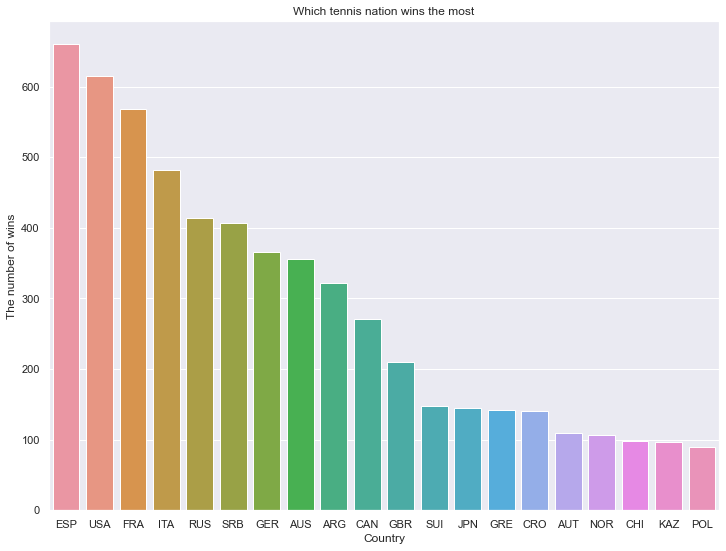

In [154]:
df_full['win'] = 1
win_countries = df_full.groupby('winner_ioc')['win', 'winner_ioc'].sum().sort_values(by=['win'], ascending=False)[:20]
win_countries.index.names = ['country']
ax = sns.barplot(x = win_countries.index, y = 'win', data=win_countries)
plt.xlabel('Country')
plt.ylabel("The number of wins")
plt.title('Which tennis nation wins the most')

Apparently Spain, the USA and France are the three countries that win the most often. Nonetheless, we don't know anything about the number of time they lose. Let's have a look at that.

C:\Users\vanku\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Which tennis nation loses the most')

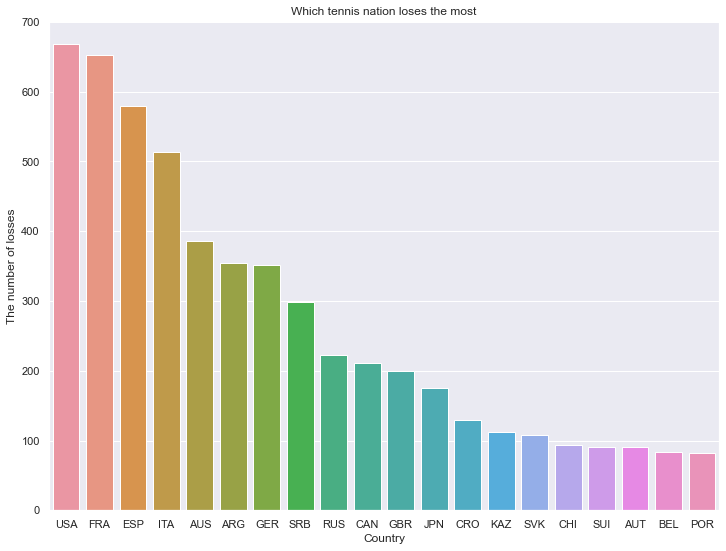

In [156]:
df_full['lose'] = 1
lose_countries = df_full.groupby('loser_ioc')['lose', 'loser_ioc'].sum().sort_values(by=['lose'], ascending=False)[:20]
lose_countries.index.names = ['country']
ax = sns.barplot(x = lose_countries.index, y = 'lose', data=lose_countries)
plt.xlabel('Country')
plt.ylabel("The number of losses")
plt.title('Which tennis nation loses the most')

Again the USA, France and Spain! This means we couldn't conclude anything from the first histogram. Then we must create a new variable which will be the ratio of the number of victories on all match played by a country. We will do that on countries that have at least 50 victories to be sure we have enough data on this country to conclude something.

In [186]:
win_countries = df_full.groupby('winner_ioc')['win', 'winner_ioc'].sum().sort_values(by=['win'], ascending=False)
win_countries = win_countries[win_countries['win'] > 50]
lose_countries = df_full.groupby('loser_ioc')['lose', 'loser_ioc'].sum().sort_values(by=['lose'], ascending=False)
win_countries.index.names = ['country']
lose_countries.index.names = ['country']
lose_countries.reset_index(inplace=True, drop=False)
win_countries.reset_index(inplace=True, drop=False)
df_combined = pd.merge(lose_countries, win_countries)
df_combined['winrate'] = df_combined['win'] / (df_combined['win'] + df_combined['lose'])

C:\Users\vanku\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\vanku\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Which tennis nation has the best winrate')

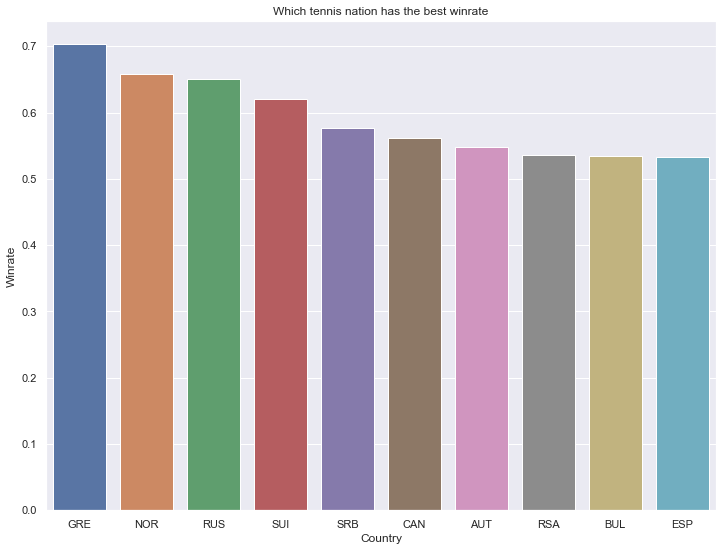

In [191]:
df_combined = df_combined.sort_values(by=['winrate'], ascending=False)[:10]
ax = sns.barplot(x = 'country', y = 'winrate', data=df_combined)
plt.xlabel('Country')
plt.ylabel("Winrate")
plt.title('Which tennis nation has the best winrate')

Hence, the best country in tennis from 2019 to 2021 is Greece with 70% winrate, followed by Norway and Russia!

## Ethics

The tennis abstract blog community funded the dataset creation for non-commercial purpose (publicly open dataset) and has become a go-to source for anyone interested in tennis statistics. It refers all professional tennis games (only men, doesn't refer the WTA - Women's Tennis Association). Some information are missing for the detailed statistics (aces, first serve point won etc.) for instances that refer a tennis match from more than a decade ago. Hence, we only looked at recent seasons (2019 - 2021). We didn't look at the 2022 season as it is still in progress as when we performed the analysis, and the dataset is only updated weekly. The data collection process has remained unclear by the author. We assume it involves manual work. Besides, we can identify the tennis players based on their name. Sub-population as well can be identified by age. Nonetheless, the dataset does not reveal data that might be considered sensitive in any way (racial or ethnic origins, sexual orientations etc.).
